Name: Qi Li

Student ID: 1005299302

Course: INF2178-Experimental Design for Data Science

Instructor: Shion Guha

Content: Technical Assignment IV

The dataset used in this assignment is derived from a longitudinal study focusing on MRI results of patients with and without dementia. The objective of this study is to analysis the variations in Estimated Total Intracranial Volume (eTIV) within the context of the participants' diagnostic groups and across different visits. Using Python and statistic method, we can check how eTIV changes over time and between different diagnostic categories.

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pip install pingouin
import pingouin as pg # Pingouin for statistical analysis

import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.9 MB/s eta 0:00:00


In [4]:
data = pd.read_csv('INF2178_A4_data.csv')
data = data.iloc[:, 1:]
data['Visit'] = data['Visit'].astype(object)

# Display
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


## EDA

<Axes: xlabel='eTIV', ylabel='Density'>

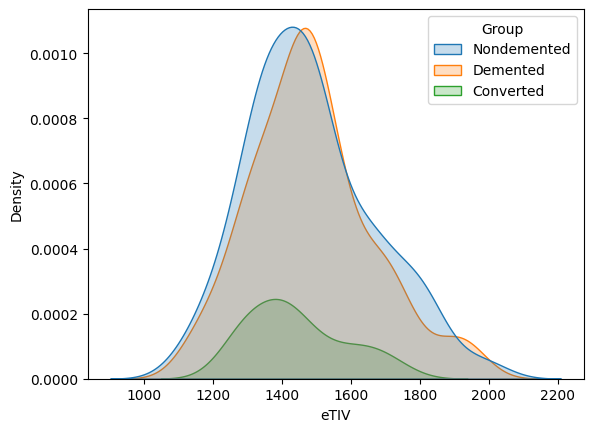

In [5]:
# Create a KDE plot for the 'eTIV' variable
sns.kdeplot(x='eTIV', data=data, fill=True, hue='Group')

<Axes: xlabel='eTIV', ylabel='Density'>

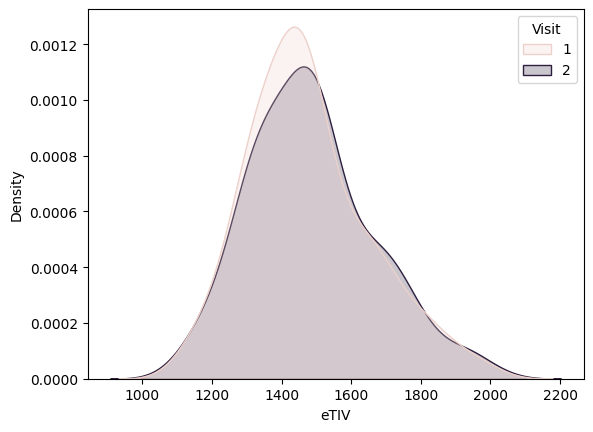

In [6]:
# Create a KDE plot for the 'eTIV' variable
sns.kdeplot(x='eTIV', data=data, fill=True, hue='Visit')

<Axes: xlabel='Group', ylabel='eTIV'>

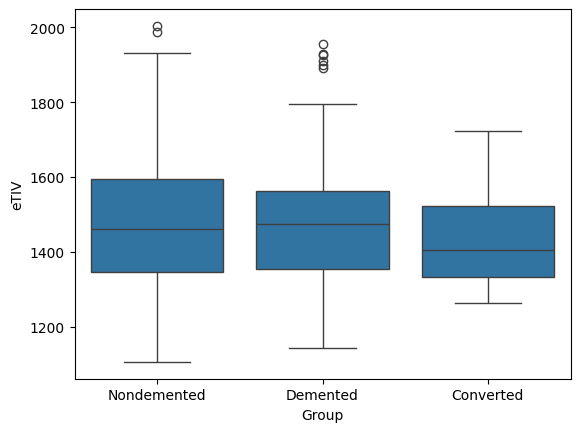

In [7]:
# Create a boxplot for the 'eTIV' variable
sns.boxplot(y='eTIV', data=data, x='Group')

<Axes: xlabel='Visit', ylabel='eTIV'>

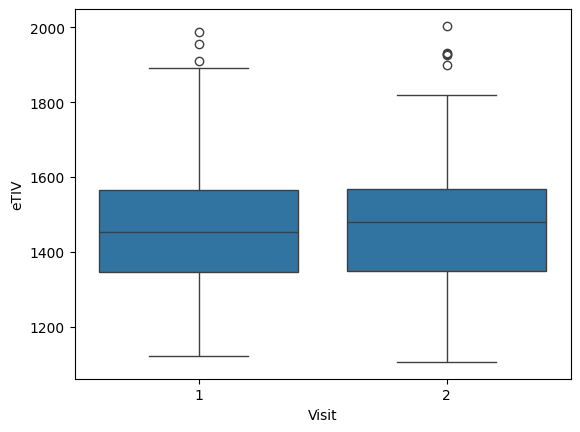

In [8]:
# Create a boxplot for the 'eTIV' variable
sns.boxplot(y='eTIV', data=data, x='Visit')

<ipython-input-9-816b770825bb>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=data, x='Visit', y='eTIV', hue='Group', dodge=True,


<Axes: xlabel='Visit', ylabel='eTIV'>

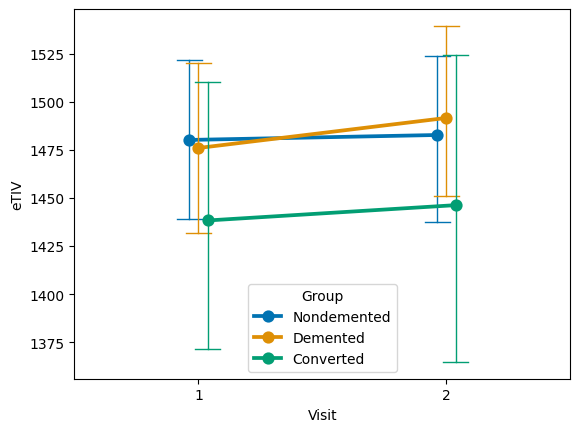

In [9]:
# Create a point plot to visualize the mean of 'eTIV' variable
sns.pointplot(data=data, x='Visit', y='eTIV', hue='Group', dodge=True,
              capsize=.1, errwidth=1, palette='colorblind')

## Statistics Models

In [10]:
# Repeated measures ANOVA
res = pg.rm_anova(dv='eTIV', within='Visit', subject='Subject ID', data=data, detailed=True)
res

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Visit,5573.920139,1,5573.920139,9.246696,0.002807,0.000619,1.0
1,Error,86200.579861,143,602.801258,NaN,NaN,NaN,NaN


In [11]:
# Performs pairwise comparisons
post_hocs = pg.pairwise_ttests(dv='eTIV', within='Visit',subject='Subject ID', data=data, padjust='fdr_bh')
post_hocs

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Visit,1,2,True,True,-3.040838,143.0,two-sided,0.002807,7.532,-0.049472


In [12]:
# Perform sphericity test
pg.sphericity(data=data, dv='eTIV', within='Visit',subject='Subject ID',)

(True, nan, nan, 1, 1.0)

In [13]:
# Perform normality test for each group separately
pg.normality(data=data, dv='eTIV', group='Group')

,W,pval,normal
Group,,,
Nondemented,0.972846,0.006306,False
Demented,0.968134,0.004531,False
Converted,0.918397,0.041241,False


In [14]:
# Display the grouped data with mean and standard deviation
data.groupby(['Visit', 'Group'])['eTIV'].agg(['mean', 'std']).round(2)

mean     std
Visit Group                       
1     Converted    1438.29  132.95
      Demented     1475.94  173.62
      Nondemented  1480.11  183.75
2     Converted    1446.25  150.29
      Demented     1491.55  177.26
      Nondemented  1482.69  186.32

In [15]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='eTIV', within='Visit', between='Group', subject='Subject ID', data=data)

pg.print_table(aov)


ANOVA SUMMARY

Source              SS    DF1    DF2         MS      F    p-unc    np2      eps
-----------  ---------  -----  -----  ---------  -----  -------  -----  -------
Group        37424.708      2    141  18712.354  0.297    0.743  0.004  nan
Visit         5573.920      1    141   5573.920  9.225    0.003  0.061    1.000
Interaction   1004.783      2    141    502.392  0.831    0.438  0.012  nan



In [16]:
# Performs pairwise comparisons
posthocs = pg.pairwise_ttests(dv='eTIV', within='Visit', between='Group', subject='Subject ID', data=data)
pg.print_table(posthocs)


POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc    BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  ------  --------
Visit          -        1          2            True      True          -3.041  143.000  two-sided        0.003   7.532    -0.049
Group          -        Converted  Demented     False     True          -0.897   17.630  two-sided        0.382   0.423    -0.249
Group          -        Converted  Nondemented  False     True          -0.796   17.491  two-sided        0.437   0.393    -0.210
Group          -        Demented   Nondemented  False     True           0.159  129.303  two-sided        0.874   0.189     0.027
Visit * Group  1        Converted  Demented     False     True          -0.863   18.004  two-sided        0.400   0.413    -0.235
Visit * Group  1        Converted  Nondemented  False     True          -

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [17]:
# Calculate the required sample size
power_analysis = smp.TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=0.7, power=0.91, alpha=0.05)
sample_size

45.45073088568012